In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords             #불용어
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

In [2]:
import numpy as np
import gensim
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile
from gensim.models.word2vec import Word2Vec
import pandas as pd

In [3]:
import re

In [35]:
 #-*- coding: utf-8 -*- 
data=pd.read_csv("D:/text_dataset3.csv", engine='python')
data.head()

,article_text,summary
0,2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다....,NaN
1,"멋진 신세계 ? 추방당한 자들은 과연 행복할까? ‘멋진 신세계’의 후반부에서, 총통...",NaN
2,"우리의 주제는 시학(작시기술)이므로 나는 먼저 시의 일반적 본질과, 그 여러 종류와...",NaN
3,그런 식으로 사랑의 사물들에 대해 배우고 정해진 질서와 차례 속에서 아름다움을 보는...,NaN
4,엄흥섭이 ‘새로운 말의 창조’에서 ‘표준 말/ 글’로 수렴하지 않는 새로운 문학어의...,NaN


In [36]:
data=data[['article_text']]
data['sentences']=data['article_text'].apply(sent_tokenize)
data['sentences'][0]

['2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다.',
 '그러자 이 사진이 인종 차별을 나타낸다며 사회적으로 문제가 되었다.',
 '그 뿐만 아니라 이 사건은 세계 여러 나라에 알려져 인종 차별에 대한 문제의식을 다시 상기시켰다.어떤 사진이었을까?',
 '학급에서 학생들이 책상에 앉아 있는 모습이었는데 문제는 사진 속 학생들의 자리 배치였다.',
 '백인 아이들 20여 명이 교탁 앞에 앉아 있고, 그 뒤쪽으로 흑인 아이들 3~4명이 따로 앉아 있었다.',
 '남아프리카공화국은 아프리카 대륙 가장 남단에 위치한 국가이다.',
 '과거 유럽 여러 나라가 아메리카 대륙으로 항해하기 위해서 전략적으로 거쳐 간 곳이다 보니, 유럽 여러 나라의 식민지가 되었다.',
 '그래서 식민지에서 벗어난 이후에도 유럽 백인들이 만든 인종 분리 제도가 공식적으로 시행되었던 역사를 갖고 있다.',
 '이 사진을 올린 학교 담임교사는 인종에 따라 학생들의 자리를 달리 배치하는 차별을 했다며 비판을 받았다.',
 '그리고 얼마 후 담임교사는 해고된 것으로 알려졌다.',
 '노벨평화상을 받은 넬슨 만델라 대통령을 비롯해 수많은 사람의 저항으로 흑백 인종 분리 정책이 사라진 지 20여년이 넘었지만 이런 인종 차별적 양상은 여전하다.이 곳만이 아니다.',
 '흑인 노예 해방 선언과 흑인 민권 운동으로 제도적인 흑백 차별이 없어진 미국에서도 여전히 흑인, 정확히는 유색 인종에 대한 차별은 노골적이다.',
 '그리고 흑인을 차별한다는 점에서 우리나라도 자유로울 수 없다.',
 '흑인 차별은 어디서부터 시작되었을까?',
 '왜 백인은 흑인을 차별하는가?',
 '인류의 역사에서 언제부터 시작된 일일까?',
 '흑인 노예 무역을 시작한 그 즈음일까?',
 '아니면 더 이른 시기일까?',
 '사실 이 부분에 대한 역사적 기록은 분명하게 존재하지 않는다.',
 '고대 사회에서는 이동 기술이 크게 발달하지 않아서 다수가 이동하는 일이 드물었다.',
 '그리고 각 사회마다

In [37]:
data

,article_text,sentences
0,2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다....,[2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다...
1,"멋진 신세계 ? 추방당한 자들은 과연 행복할까? ‘멋진 신세계’의 후반부에서, 총통...","[멋진 신세계 ?, 추방당한 자들은 과연 행복할까?, ‘멋진 신세계’의 후반부에서,..."
2,"우리의 주제는 시학(작시기술)이므로 나는 먼저 시의 일반적 본질과, 그 여러 종류와...","[우리의 주제는 시학(작시기술)이므로 나는 먼저 시의 일반적 본질과, 그 여러 종류..."
3,그런 식으로 사랑의 사물들에 대해 배우고 정해진 질서와 차례 속에서 아름다움을 보는...,[그런 식으로 사랑의 사물들에 대해 배우고 정해진 질서와 차례 속에서 아름다움을 보...
4,엄흥섭이 ‘새로운 말의 창조’에서 ‘표준 말/ 글’로 수렴하지 않는 새로운 문학어의...,[엄흥섭이 ‘새로운 말의 창조’에서 ‘표준 말/ 글’로 수렴하지 않는 새로운 문학어...


In [38]:
kovec=Word2Vec.load("D:\ko.bin")
#kovec=gensim.models.KeyedVectors.load_word2vec_format('D:\ko.bin',binary=True)

In [39]:
model=Word2Vec(data,sg=1,size=100,window=3,min_count=3,workers=4)

In [42]:
stop_words=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def preprocess_sentence(sentence):
    sentence=[re.sub(r'[^가-힣\s]','',word) for word in sentence]
    return [word for word in sentence if word not in stop_words and word]

def preprocess_sentences(sentences):
    return [preprocess_sentence(sentence) for sentence in sentences]
#a-zA-Z, 즉 영어는 포함 안되게 했음

In [43]:
## 형태소 단위로 Tokenize
from konlpy.tag import Okt  
okt=Okt()

def tokenization(sentences):
    temp=[]
    for sentence in sentences:
        temp_X=okt.morphs(sentence,stem=True)
        temp_X=[word for word in temp_X]
        temp.append(temp_X)
    return temp


data['tokenized_data']=data['sentences'].apply(tokenization)
    
data['tokenized_data']=data['tokenized_data'].apply(preprocess_sentences)
    
print(data)

                                        article_text  \
0  2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다....   
1  멋진 신세계 ? 추방당한 자들은 과연 행복할까? ‘멋진 신세계’의 후반부에서, 총통...   
2  우리의 주제는 시학(작시기술)이므로 나는 먼저 시의 일반적 본질과, 그 여러 종류와...   
3  그런 식으로 사랑의 사물들에 대해 배우고 정해진 질서와 차례 속에서 아름다움을 보는...   
4  엄흥섭이 ‘새로운 말의 창조’에서 ‘표준 말/ 글’로 수렴하지 않는 새로운 문학어의...   

                                           sentences  \
0  [2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다...   
1  [멋진 신세계 ?, 추방당한 자들은 과연 행복할까?, ‘멋진 신세계’의 후반부에서,...   
2  [우리의 주제는 시학(작시기술)이므로 나는 먼저 시의 일반적 본질과, 그 여러 종류...   
3  [그런 식으로 사랑의 사물들에 대해 배우고 정해진 질서와 차례 속에서 아름다움을 보...   
4  [엄흥섭이 ‘새로운 말의 창조’에서 ‘표준 말/ 글’로 수렴하지 않는 새로운 문학어...   

                                      tokenized_data  
0  [[년, 월, 남아프리카공화국, 초등학교, 에서, 찍히다, 사진, 올라오다], [그...  
1  [[멋지다, 신세계], [추방, 당, 과연, 행복하다], [멋지다, 신세계, 후반,...  
2  [[우리, 주제, 시학, 작시, 기술, 이다, 나, 먼저, 시, 일반, 적, 본질,...  
3  [[그렇다, 식, 사랑, 사물, 대해, 배우다, 정해진, 질서, 차례, 속, 에서,...  
4  [[엄흥섭, 새롭다, 말, 창조, 에서, 표준, 말, 글, 로, 수렴, 않다, 새롭..

In [44]:
embedding_dim=200
zero_vector=np.zeros(embedding_dim)

In [45]:
def calculate_sentence_vector(sentence):
    if len(sentence) != 0:
        sum=0
        for word in sentence:
            try: 
                sum+=kovec.wv[word]
            except Exception:
                sum+=zero_vector
        return sum/len(sentence)
    else:
        return zero_vector

In [46]:
def sentences_to_vectors(sentences):
    return [calculate_sentence_vector(sentence) for sentence in sentences]

In [47]:
data['SentenceEmbedding']=data['tokenized_data'].apply(sentences_to_vectors)
data[['SentenceEmbedding']]

,SentenceEmbedding
0,"[[-0.23459417, 0.26344845, -0.31627733, 0.0935..."
1,"[[0.08862824738025665, -0.3803623914718628, 0...."
2,"[[0.26399252, -0.18176092, -0.32884452, 0.4453..."
3,"[[-0.10559843528655267, 0.09850261426500735, 0..."
4,"[[0.03389105490512318, -0.5181946489028633, 0...."


In [48]:
def similarity_matrix(sentence_embedding):
    sim_mat=np.zeros([len(sentence_embedding),len(sentence_embedding)])
    for i in range(len(sentence_embedding)):
        for j in range(len(sentence_embedding)):
            sim_mat[i][j]=cosine_similarity(sentence_embedding[i].reshape(1,embedding_dim),
                                           sentence_embedding[j].reshape(1,embedding_dim))[0,0]
    return sim_mat

In [49]:
data['SimMatrix']=data['SentenceEmbedding'].apply(similarity_matrix)
data['SimMatrix']

0    [[1.0, -0.20844414819589205, -0.11414374411106...
1    [[1.0000000000000007, -0.1384629748122961, 0.3...
2    [[1.0, 0.6264175924904023, 0.4529840350151062,...
3    [[1.0, 0.5543883422230558, 0.5358998889512404,...
4    [[1.0000000000000009, 0.7101195937906216, 0.53...
Name: SimMatrix, dtype: object

In [50]:
data

,article_text,sentences,tokenized_data,SentenceEmbedding,SimMatrix
0,2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다....,[2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다...,"[[년, 월, 남아프리카공화국, 초등학교, 에서, 찍히다, 사진, 올라오다], [그...","[[-0.23459417, 0.26344845, -0.31627733, 0.0935...","[[1.0, -0.20844414819589205, -0.11414374411106..."
1,"멋진 신세계 ? 추방당한 자들은 과연 행복할까? ‘멋진 신세계’의 후반부에서, 총통...","[멋진 신세계 ?, 추방당한 자들은 과연 행복할까?, ‘멋진 신세계’의 후반부에서,...","[[멋지다, 신세계], [추방, 당, 과연, 행복하다], [멋지다, 신세계, 후반,...","[[0.08862824738025665, -0.3803623914718628, 0....","[[1.0000000000000007, -0.1384629748122961, 0.3..."
2,"우리의 주제는 시학(작시기술)이므로 나는 먼저 시의 일반적 본질과, 그 여러 종류와...","[우리의 주제는 시학(작시기술)이므로 나는 먼저 시의 일반적 본질과, 그 여러 종류...","[[우리, 주제, 시학, 작시, 기술, 이다, 나, 먼저, 시, 일반, 적, 본질,...","[[0.26399252, -0.18176092, -0.32884452, 0.4453...","[[1.0, 0.6264175924904023, 0.4529840350151062,..."
3,그런 식으로 사랑의 사물들에 대해 배우고 정해진 질서와 차례 속에서 아름다움을 보는...,[그런 식으로 사랑의 사물들에 대해 배우고 정해진 질서와 차례 속에서 아름다움을 보...,"[[그렇다, 식, 사랑, 사물, 대해, 배우다, 정해진, 질서, 차례, 속, 에서,...","[[-0.10559843528655267, 0.09850261426500735, 0...","[[1.0, 0.5543883422230558, 0.5358998889512404,..."
4,엄흥섭이 ‘새로운 말의 창조’에서 ‘표준 말/ 글’로 수렴하지 않는 새로운 문학어의...,[엄흥섭이 ‘새로운 말의 창조’에서 ‘표준 말/ 글’로 수렴하지 않는 새로운 문학어...,"[[엄흥섭, 새롭다, 말, 창조, 에서, 표준, 말, 글, 로, 수렴, 않다, 새롭...","[[0.03389105490512318, -0.5181946489028633, 0....","[[1.0000000000000009, 0.7101195937906216, 0.53..."


In [51]:
def draw_graphs(sim_matrix):
    nx_graph=nx.from_numpy_array(sim_matrix)
    plt.figure(figsize=(10,10))
    pos=nx.spring_layout(nx_graph)
    nx.draw(nx_graph,with_labels=True,font_weight='bold')
    nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
    plt.show()

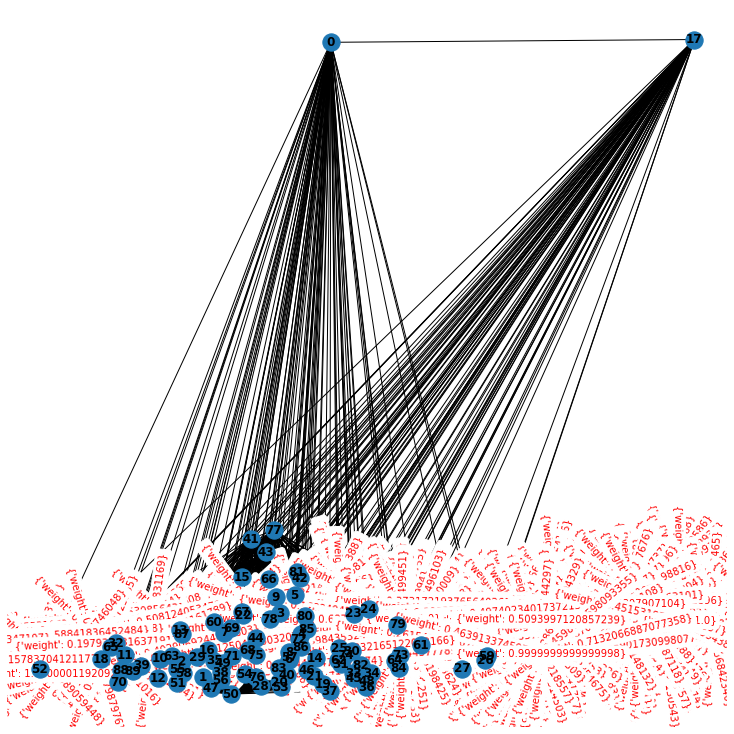

In [52]:
draw_graphs(data['SimMatrix'][0])

In [53]:
def calculate_score(sim_matrix):
    nx_graph=nx.from_numpy_array(sim_matrix)
    scores=nx.pagerank_numpy(nx_graph)
    return scores

In [55]:
data['score']=data['SimMatrix'].apply(calculate_score)
data[['SimMatrix','score']]

,SimMatrix,score
0,"[[1.0, -0.20844414819589205, -0.11414374411106...","{0: -0.0003738251937829934, 1: 0.0146685250527..."
1,"[[1.0000000000000007, -0.1384629748122961, 0.3...","{0: 287644929540264.9, 1: 108508104968915.66, ..."
2,"[[1.0, 0.6264175924904023, 0.4529840350151062,...","{0: 0.07673383309333742, 1: 0.064935323431999,..."
3,"[[1.0, 0.5543883422230558, 0.5358998889512404,...","{0: 0.09747835229888481, 1: 0.0958712231478606..."
4,"[[1.0000000000000009, 0.7101195937906216, 0.53...","{0: 0.07707790843475226, 1: 0.0643952984323744..."


In [56]:
data['score'][0]

{0: -0.0003738251937829934,
 1: 0.01466852505275864,
 2: 0.01407353640397073,
 3: 0.010689649236245182,
 4: 0.009269193400708196,
 5: 0.006477034719728648,
 6: 0.011146206861331555,
 7: 0.011706634850664107,
 8: 0.013795955872648617,
 9: 0.006383613403393967,
 10: 0.014415827954428953,
 11: 0.013763403016066215,
 12: 0.013461121293884227,
 13: 0.010082155327944682,
 14: 0.014492046897662099,
 15: 0.006520621665907301,
 16: 0.012157022273210298,
 17: 0.0005768778194873564,
 18: 0.010779305880519443,
 19: 0.009348266474566599,
 20: 0.01370294165407469,
 21: 0.01273482462083567,
 22: 0.011507265840062788,
 23: 0.007314217860313884,
 24: 0.005989284963806935,
 25: 0.00741311393310991,
 26: 0.009406026007597192,
 27: 0.010510943626187213,
 28: 0.007984810872713403,
 29: 0.011018754886864924,
 30: 0.0119228790679581,
 31: 0.011616890852885161,
 32: 0.008668768793070533,
 33: 0.013187173218912348,
 34: 0.014333362399650893,
 35: 0.014743236595230462,
 36: 0.010656513869762161,
 37: 0.00927610

In [57]:
def ranked_sentences(sentences,scores,n=3):
    top_scores=sorted(((scores[i],s)
                      for i,s in enumerate(sentences)),
                     reverse=True)
    top_n_sentences=[sentence for score,sentence in top_scores[:n]]
    return " ".join(top_n_sentences)

In [58]:
data

,article_text,sentences,tokenized_data,SentenceEmbedding,SimMatrix,score
0,2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다....,[2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다...,"[[년, 월, 남아프리카공화국, 초등학교, 에서, 찍히다, 사진, 올라오다], [그...","[[-0.23459417, 0.26344845, -0.31627733, 0.0935...","[[1.0, -0.20844414819589205, -0.11414374411106...","{0: -0.0003738251937829934, 1: 0.0146685250527..."
1,"멋진 신세계 ? 추방당한 자들은 과연 행복할까? ‘멋진 신세계’의 후반부에서, 총통...","[멋진 신세계 ?, 추방당한 자들은 과연 행복할까?, ‘멋진 신세계’의 후반부에서,...","[[멋지다, 신세계], [추방, 당, 과연, 행복하다], [멋지다, 신세계, 후반,...","[[0.08862824738025665, -0.3803623914718628, 0....","[[1.0000000000000007, -0.1384629748122961, 0.3...","{0: 287644929540264.9, 1: 108508104968915.66, ..."
2,"우리의 주제는 시학(작시기술)이므로 나는 먼저 시의 일반적 본질과, 그 여러 종류와...","[우리의 주제는 시학(작시기술)이므로 나는 먼저 시의 일반적 본질과, 그 여러 종류...","[[우리, 주제, 시학, 작시, 기술, 이다, 나, 먼저, 시, 일반, 적, 본질,...","[[0.26399252, -0.18176092, -0.32884452, 0.4453...","[[1.0, 0.6264175924904023, 0.4529840350151062,...","{0: 0.07673383309333742, 1: 0.064935323431999,..."
3,그런 식으로 사랑의 사물들에 대해 배우고 정해진 질서와 차례 속에서 아름다움을 보는...,[그런 식으로 사랑의 사물들에 대해 배우고 정해진 질서와 차례 속에서 아름다움을 보...,"[[그렇다, 식, 사랑, 사물, 대해, 배우다, 정해진, 질서, 차례, 속, 에서,...","[[-0.10559843528655267, 0.09850261426500735, 0...","[[1.0, 0.5543883422230558, 0.5358998889512404,...","{0: 0.09747835229888481, 1: 0.0958712231478606..."
4,엄흥섭이 ‘새로운 말의 창조’에서 ‘표준 말/ 글’로 수렴하지 않는 새로운 문학어의...,[엄흥섭이 ‘새로운 말의 창조’에서 ‘표준 말/ 글’로 수렴하지 않는 새로운 문학어...,"[[엄흥섭, 새롭다, 말, 창조, 에서, 표준, 말, 글, 로, 수렴, 않다, 새롭...","[[0.03389105490512318, -0.5181946489028633, 0....","[[1.0000000000000009, 0.7101195937906216, 0.53...","{0: 0.07707790843475226, 1: 0.0643952984323744..."


In [59]:
data['summary'] = data.apply(lambda x:
                            ranked_sentences(x.sentences, x.score),axis=1)

In [60]:
for i in range(0,len(data)):
    print(i+1,'번 문서')
    print('원문 : ',data.loc[i].article_text)
    print(' ')
    print('요약 : ',data.loc[i].summary)
    print('')

1 번 문서
원문 :  2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다. 그러자 이 사진이 인종 차별을 나타낸다며 사회적으로 문제가 되었다. 그 뿐만 아니라 이 사건은 세계 여러 나라에 알려져 인종 차별에 대한 문제의식을 다시 상기시켰다.어떤 사진이었을까? 학급에서 학생들이 책상에 앉아 있는 모습이었는데 문제는 사진 속 학생들의 자리 배치였다. 백인 아이들 20여 명이 교탁 앞에 앉아 있고, 그 뒤쪽으로 흑인 아이들 3~4명이 따로 앉아 있었다. 남아프리카공화국은 아프리카 대륙 가장 남단에 위치한 국가이다. 과거 유럽 여러 나라가 아메리카 대륙으로 항해하기 위해서 전략적으로 거쳐 간 곳이다 보니, 유럽 여러 나라의 식민지가 되었다. 그래서 식민지에서 벗어난 이후에도 유럽 백인들이 만든 인종 분리 제도가 공식적으로 시행되었던 역사를 갖고 있다. 이 사진을 올린 학교 담임교사는 인종에 따라 학생들의 자리를 달리 배치하는 차별을 했다며 비판을 받았다. 그리고 얼마 후 담임교사는 해고된 것으로 알려졌다. 노벨평화상을 받은 넬슨 만델라 대통령을 비롯해 수많은 사람의 저항으로 흑백 인종 분리 정책이 사라진 지 20여년이 넘었지만 이런 인종 차별적 양상은 여전하다.이 곳만이 아니다. 흑인 노예 해방 선언과 흑인 민권 운동으로 제도적인 흑백 차별이 없어진 미국에서도 여전히 흑인, 정확히는 유색 인종에 대한 차별은 노골적이다. 그리고 흑인을 차별한다는 점에서 우리나라도 자유로울 수 없다. 흑인 차별은 어디서부터 시작되었을까? 왜 백인은 흑인을 차별하는가? 인류의 역사에서 언제부터 시작된 일일까? 흑인 노예 무역을 시작한 그 즈음일까? 아니면 더 이른 시기일까? 사실 이 부분에 대한 역사적 기록은 분명하게 존재하지 않는다. 고대 사회에서는 이동 기술이 크게 발달하지 않아서 다수가 이동하는 일이 드물었다. 그리고 각 사회마다 자신들과 다른 곳에 사는 모든 이들이 삶의 영역을 침해하는 이방인이었기에, 피부색에 상관없이 이방인은 그 자체로 모두가 적

In [71]:
data['summary_sentences']=data['summary'].apply(sent_tokenize)

In [74]:
print(data.loc[0].summary_sentences)

['왓슨의 인종 차별 발언은 그가 연구한 과학적인 증거를 기반으로 한 것이 아니라, 편견이 가득한 한 개인의 헛소리일 뿐이었다.문제는 흑인에 대한 편견을 과학의 이름으로 교묘하게 포장했다는 점이다.', '이 책에서 고비노는 “가장 우수한 인종은 백인종인 코카서스 인종이고, 이들이 세계 문명의 발전을 이끌고 있는데, 열등한 유색 인종과의 혼혈로 우월한 인종의 피가 손상되어 인류 전체가 쇠퇴할 것”이라는 비논리적인 주장을 하였다.', '노예제를 폐지하기는 했지만 흑인을 동등한 인간으로 인정하지 않는 생활을 지속했던 것이다.']


In [72]:
print(data.loc[0].sentences)

['2019년 1월에 남아프리카공화국의 한 초등학교에서 찍힌 사진이 SNS에 올라왔다.', '그러자 이 사진이 인종 차별을 나타낸다며 사회적으로 문제가 되었다.', '그 뿐만 아니라 이 사건은 세계 여러 나라에 알려져 인종 차별에 대한 문제의식을 다시 상기시켰다.어떤 사진이었을까?', '학급에서 학생들이 책상에 앉아 있는 모습이었는데 문제는 사진 속 학생들의 자리 배치였다.', '백인 아이들 20여 명이 교탁 앞에 앉아 있고, 그 뒤쪽으로 흑인 아이들 3~4명이 따로 앉아 있었다.', '남아프리카공화국은 아프리카 대륙 가장 남단에 위치한 국가이다.', '과거 유럽 여러 나라가 아메리카 대륙으로 항해하기 위해서 전략적으로 거쳐 간 곳이다 보니, 유럽 여러 나라의 식민지가 되었다.', '그래서 식민지에서 벗어난 이후에도 유럽 백인들이 만든 인종 분리 제도가 공식적으로 시행되었던 역사를 갖고 있다.', '이 사진을 올린 학교 담임교사는 인종에 따라 학생들의 자리를 달리 배치하는 차별을 했다며 비판을 받았다.', '그리고 얼마 후 담임교사는 해고된 것으로 알려졌다.', '노벨평화상을 받은 넬슨 만델라 대통령을 비롯해 수많은 사람의 저항으로 흑백 인종 분리 정책이 사라진 지 20여년이 넘었지만 이런 인종 차별적 양상은 여전하다.이 곳만이 아니다.', '흑인 노예 해방 선언과 흑인 민권 운동으로 제도적인 흑백 차별이 없어진 미국에서도 여전히 흑인, 정확히는 유색 인종에 대한 차별은 노골적이다.', '그리고 흑인을 차별한다는 점에서 우리나라도 자유로울 수 없다.', '흑인 차별은 어디서부터 시작되었을까?', '왜 백인은 흑인을 차별하는가?', '인류의 역사에서 언제부터 시작된 일일까?', '흑인 노예 무역을 시작한 그 즈음일까?', '아니면 더 이른 시기일까?', '사실 이 부분에 대한 역사적 기록은 분명하게 존재하지 않는다.', '고대 사회에서는 이동 기술이 크게 발달하지 않아서 다수가 이동하는 일이 드물었다.', '그리고 각 사회마다 자신들과 다른 곳에 사는 모든 이들

In [75]:
data['tokenized_data_for_word']=data['summary_sentences'].apply(tokenization)
    
data['tokenized_data_for_word']=data['tokenized_data_for_word'].apply(preprocess_sentences)

def list_to_string(tokenized_data):
    tmp=[]
    for token_sentence in tokenized_data:
        for token in token_sentence:
            tmp.append(token)
    return tmp

data['token']=data['tokenized_data_for_word'].apply(list_to_string)

data['token']

0    [왓슨, 인종, 차별, 발언, 그, 연구, 과학, 적, 인, 증거, 기반, 것, 아...
1    [멋지다, 신세계, 후반, 부, 에서, 총통, 무스타파, 몬드, 헬름홀츠, 버나드,...
2    [그것, 무용가, 동작, 율동, 만으로, 성격, 감정, 행동, 을, 모방, 때문, ...
3    [그것, 지상, 밉다, 들다, 유일하다, 계단, 이용, 첫, 계단, 에서, 두번째,...
4    [위, 인용문, 일상, 대화, 에서, 니, 찌, 요, 비, 겟곤, 스, 바라다, 호...
Name: token, dtype: object

In [76]:
def calculate_word_vector(word):                        
    if len(word) != 0:                        
        sum=0                        
        for token in word:
            try: 
                sum+=kovec.wv[token]
            except Exception:
                sum+=zero_vector
        return sum
    else:
        return zero_vector

def words_to_vectors(words):
    return [calculate_word_vector(word) for word in words]

data['word_value']=data['token'].apply(words_to_vectors)
data['word_value']

data['SimMatrix_word']=data['word_value'].apply(similarity_matrix)
data['SimMatrix_word']

data['word_score']=data['SimMatrix_word'].apply(calculate_score)
data['word_score']



0    {0: -51454318577506.23, 1: -48098663413867.25,...
1    {0: 3875414538393.411, 1: -2152262125077.479, ...
2    {0: -84333464160855.22, 1: -15399859689030.959...
3    {0: 88220734399729.58, 1: 19741672693862.695, ...
4    {0: -8199302043261.809, 1: 40786654963275.58, ...
Name: word_score, dtype: object

In [78]:
def ranked_words(tokenized_data, scores, n=100):
    top_scores=sorted(((scores[i],s)
                      for i,s in enumerate(tokenized_data)),
                     reverse=True)
    #top_n_sentences=[sentence for score,sentence in top_scores[:n]]
    top_n_sentences=[]
    for score, word in top_scores:
        if word not in top_n_sentences:
            top_n_sentences.append(word)
    return " ".join(top_n_sentences)

data['important_word'] = data.apply(lambda x:
                           ranked_words(x.token, x.word_score),axis=1)
import sys
np.set_printoptions(threshold=sys.maxsize)
data['important_word'][3]

'없다 있다 않다 것 그것 닮다 들다 또는 이다 게 밉다 까지 에게도 같다 어떻다 혹은 얻다 적 개별 때 의하다 즉 을 에는 내 지식 되어다 에게로 도달 그 다른 되다 지상 말 속 물질 이외 나아가다 그러하다 이나 시작 아름답다 나타나다 진정하다 두번째 올라가다 인도 로 간 공 정하나 그리고 형식 알 손 유일하다 위해 질서 에서 마침내 이용 위로 얼굴 자체 연설 사물 부분 생명체 부정 천상 모든 계단 학문 첫 대상 신체 절대 사랑 진행 형태 으로부터 로부터 실제 존재'